<span style="color:black"><center>PROCESS OF DATA SCIENCE</center></span>
## Introduction
In this assignment, a part of the 20 newsgroups dataset is being used.'20 newsgroups dataset' is a part of Scikit learn which could be found
[here](https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html).This complete dataset is a raw text which can be divided into five major categories Data, Target, Target Names,Filenames and DESCR. However, the focus is to work on 'Data' and 'Target' part only, wherein 'Data' is processed and along with 'Target' text, it is used to fit a classifier. 
In sklearn, this newsgroup dataset is splitted into training and testing set but it is not utilized for this assignment.The dataset is manually splitted in training and testing(70-30%) set.


---

Answer : 1 


Collocation Extraction

---



To download the newsgroup data, firstly all the relevant libraries are imported. After importing the libraries, out of 20 categories of newsgroups data, only four categories(alt.atheism, talk.religion.misc, comp.graphics, sci.space) has been taken into consideration. 



In [1]:
#Importing all necessary libraries

from sklearn.datasets import fetch_20newsgroups
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from pprint import pprint
from nltk.collocations import *
import re
import string
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer



In [2]:
#Considering four newsgroups dataset from '20 newsgroups dataset'

newsgroups_data = ['alt.atheism', 'talk.religion.misc','comp.graphics','sci.space']
newsgroups_record = fetch_20newsgroups(subset='all', categories=newsgroups_data)


Answer : 1(a)

----

Collocation Extraction - Tokenization and Part-of-Speech tagging

Pre-requisite to Tokenization

----

Before performing tokenization, basic cleaning is performed on the dataset like removing numbers and non letter characters. Once the data is cleaned, standard tokenisation technique has been used and then on those tokenized words POS tagging has been performed.



In [3]:
# Function to remove numbers and other non-letter characters. This function is checking if the text has URL,
# a number or special characters and then returning the cleaned text

def clean_newsgroup_text(text):  
        if(re.search("http[:.A-Za-z0-9\/]*",text)):
            text=re.sub("http[:.A-Za-z0-9\/]*",'',text)
        if(re.search(r'\d', text)):
            text=re.sub(r'\d','',text)            
        if(re.search("[`~!@#$%^&*,]",text)):
            text=re.sub("[`:~!@#$%^&*]",'',text)
        regex = re.compile('[' + re.escape(string.punctuation) + '\\r\\t\\n]')
        text = regex.sub(" ",text)
        
        return text

In [4]:
# Cleaning the dataset and stored it in 'clean_newsgroup_data'

clean_newsgroup_data = []
for i in range(len(newsgroups_record.data)):
    clean_text=clean_newsgroup_text(newsgroups_record.data[i])
    clean_newsgroup_data.append(clean_text)
pprint(len(clean_newsgroup_data))

3387


Performing tokenization and POS tagging

----

In [5]:
# Performing tokenization on 'clean_newsgroup_data' ( No numbers and no non-letter characters present)
tokenized_text_full = []
for i in range(len(clean_newsgroup_data)):
    
    tokenized_text=word_tokenize(clean_newsgroup_data[i])
    for j in range(len(tokenized_text)):
         tokenized_text_full.append(tokenized_text[j])
pprint(len(tokenized_text_full))

1064239


In [6]:
# Perform POS tagging on 'tokenized_text_full' (Tokenized data)
newsgroup_pos = nltk.pos_tag(tokenized_text_full)

In [7]:
pprint(len(newsgroup_pos))

1064239



Answer : 1(b)

----

Collocation Extraction - Bigram collocation 

----

Pre-requisite to Bigram Collocation extraction

----
Before extracting the bigram collocation from the corpus,then remove the Stopwords from the corpus to get the better visibility of meaningful bigram collocations. Once the stopwords are removed, below mentioned techniques are used to extract bugram collocations - 

1. Frequency with Filter
2. PMI
3. T-test with filter
4. chi-sq test

Note: Only top 20 results of each techniques is shown here.



In [8]:
# Converting data into lowercase for perfoming stopword removal (since few stopword with capital letter were ignored)

newsword_lower = []
for w in range(len(tokenized_text_full)):
    if((len(tokenized_text_full[w]))>2):
        newsword_lower.append(tokenized_text_full[w].lower())


In [9]:
len(newsword_lower)

826372

In [10]:
#fetching the standard stopwords from English language dictionary

from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'do', 'have', 'this', 'about', 'their', 'wouldn', "that'll", 'll', 'aren', 'at', 'only', 't', 'such', 'so', 'you', 've', 'couldn', 'the', 'few', 'further', 'up', 'which', "wasn't", 'how', 'me', 'its', 'for', 'nor', 'will', 'shan', 'has', 'myself', "she's", "hadn't", 'wasn', 'themselves', 'very', 'y', 'haven', 'now', 'him', 'what', 'not', "doesn't", 'we', 'out', 'over', 'does', 'shouldn', 'yourself', 'once', 'they', 'should', 'he', 'some', "don't", "isn't", 'there', "you'd", 'is', 'below', 'isn', 'most', 'theirs', "you've", 'yourselves', 'that', 'an', "needn't", 'had', 'o', "should've", 'doing', 'before', 'against', 're', 'no', 'other', 'needn', 'himself', 'having', 'ours', 'each', 'were', 'itself', 'while', 'didn', "it's", 'under', 'through', 'with', 'more', 'until', 'again', 'our', 'herself', 'hadn', 'between', 'am', "won't", 'yours', "mustn't", 'd', 'same', 'my', 'both', 'mustn', 'in', 'who', 'them', 'any', 'these', 'during', 'after', 'ourselves', 'ma', 'and', 'on', 'above', 'her', 

In [11]:
# removing the stopwords from corpus on basis of stopwords available in English dictionary

filtered_sent=[]
tokenized_sent = newsword_lower
for w in tokenized_sent:
    if w not in stop_words:
        filtered_sent.append(w)
pprint(len(filtered_sent))

582540


----
Extracting Bigram Collocation using "Frequency with filter" technique

In this bigram collocation extraction technique, we are first calculating the occurance of each bigram-collocation and then, using the POS filter to filter out bigram collocation which occur in a sequence of Noun-Noun, Noun-Adjective,  

In [12]:
bigrams = nltk.collocations.BigramAssocMeasures()
bigramFinder = nltk.collocations.BigramCollocationFinder.from_words(filtered_sent)

In [13]:
def posType(ngram):
    pos_type1 = ('JJ','NN','NNS', 'NNP', 'NNPS')
    pos_type2 = ('NN', 'NNS', 'NNP', 'NNPS')
    tags = nltk.pos_tag(ngram)
    if tags[0][1] in pos_type1 and tags[1][1] in pos_type1:
        return True
    else:
        return False



In [14]:
import pandas as pd

#extracting the frequency of bigram-collocation using filter
bigramFinder.apply_freq_filter(20)



bigram_freq = bigramFinder.ngram_fd.items()
bigramFreqTable = pd.DataFrame(list(bigram_freq), columns=['bigram','freq']).sort_values(by='freq', ascending=False).head(23)


filtered_bigram_freq = bigramFreqTable[bigramFreqTable.bigram.map(lambda x: posType(x))]

#re-setting the index of dataframe
bigramFreqTable_reset = filtered_bigram_freq.reset_index(drop=True,inplace=False)
bigramFreqTable_reset['bigram']


0               (lines, article)
1                  (lines, nntp)
2                 (article, apr)
3     (organization, university)
4                    (nasa, gov)
5              (writes, article)
6          (distribution, world)
7                 (caltech, edu)
8                    (uiuc, edu)
9          (lines, distribution)
10                    (sgi, com)
11                  (apple, com)
12                    (cmu, edu)
13                    (wpd, sgi)
14                (toronto, edu)
15                 (world, nntp)
16                   (cso, uiuc)
17                 (alaska, edu)
18        (sandviknewton, apple)
19                   (cwru, edu)
Name: bigram, dtype: object

----

Extracting Bigram Collocation using "PMI technique"

----

In [15]:
#pmi test after filter

#finding top 20 bigram-collocation based on PMI
bigram_pmi_words = bigramFinder.nbest(bigrams.pmi, 20) 

#finding bigram-collocation along with the n-gram score
bigramPMITable = pd.DataFrame(list(bigramFinder.score_ngrams(bigrams.pmi)), columns=['bigram','PMI']).sort_values(by='PMI', ascending=False).head(20)
bigramPMITable


,bigram,PMI
0,"(mayans, televison)",14.830069
1,"(televison, repo)",14.830069
2,"(tmcspartan, brocku)",14.692566
3,"(evelyn, conlon)",14.692566
4,"(hatching, odwyersse)",14.692566
5,"(hens, evelyn)",14.692566
6,"(odwyersse, hens)",14.692566
7,"(acoopermac, macalstr)",14.451558
8,"(notre, dame)",14.451558
9,"(xxxx, xxxx)",14.441504


----
Extracting Bigram Collocation using "t-test with filter technique"



In [16]:
#t - test

#finding top 20 bigram-collocation based on t-test
bigram_ttest_words = bigramFinder.nbest(bigrams.student_t, 20) 

bigramTtable = pd.DataFrame(list(bigramFinder.score_ngrams(bigrams.student_t)), columns=['bigram','t']).sort_values(by='t', ascending=False).head(20)

bigramTtable


,bigram,t
0,"(nntp, posting)",38.561834
1,"(posting, host)",38.518012
2,"(lines, article)",29.430273
3,"(lines, nntp)",24.262751
4,"(article, apr)",23.821560
5,"(nasa, gov)",22.763974
6,"(organization, university)",22.611169
7,"(writes, article)",21.729291
8,"(distribution, world)",19.219727
9,"(caltech, edu)",18.149871


----

Extracting Bigram Collocation using "chi-test technique"

----

In [17]:
#chi squared - test
from nltk.metrics import BigramAssocMeasures

#finding top 20 bigram-collocation based on t-test
bigram_chitest_words = bigramFinder.nbest(BigramAssocMeasures.chi_sq,20)


bigramchisqtable = pd.DataFrame(list(bigramFinder.score_ngrams(BigramAssocMeasures.chi_sq)), columns=['bigram','chi-squared']).sort_values(by='chi-squared', ascending=False).head(20)
bigramchisqtable

,bigram,chi-squared
0,"(alink, ksand)",582540.000000
6,"(mayans, televison)",582540.000000
1,"(carnegie, mellon)",582540.000000
9,"(odwyersse, hens)",582540.000000
8,"(notre, dame)",582540.000000
7,"(mchp, sni)",582540.000000
10,"(televison, repo)",582540.000000
5,"(hens, evelyn)",582540.000000
4,"(hatching, odwyersse)",582540.000000
3,"(evelyn, conlon)",582540.000000


----

Answer : 1(c)

----

Comparing different filtering techniques using table

Here we can observe that top 20 results of each technique is different set of bigram-collocation. However, we can also observe some overlapping in the results of different techniques.Results from PMI test and chi-square test seems to be overlapping upto some extent. However, results from Frequency test seems to overlap with t-test results.
While comparing PMI and chi-squared technique, the overlapping percentage observed to be approximately 55% whereas frquency with filter technique shows around 90% overall of bigram collocation with ttest technique. 

And therefore,it is recommended to take the union of the result of these techniques because union will avoid the repeated word and will consider only unique bigram collocation across techniques.



----

In [18]:
#overlapping words in PMI and chi-squared technique

n_list = []

n_list.append([x for x in bigram_chitest_words if x in bigram_pmi_words])

overlap_percentage = (len(n_list[0])/20)*100

overlap_percentage


55.00000000000001

In [19]:
#overlapping words in frequency with filter and ttest technique
n_list2 = []

n_list2.append([h for h in bigramFreqTable_reset['bigram'] if h in bigram_ttest_words])

overlap_percentage = (len(n_list2[0])/20)*100
overlap_percentage


90.0

Below is the complete table for comparision of bigram-collocation extracted from different techniques.

---

In [20]:
df_combined = pd.concat([bigramFreqTable_reset,bigramPMITable,bigramTtable,bigramchisqtable], axis=1)
df_combined

,bigram,freq,bigram,PMI,bigram,t,bigram,chi-squared
0,"(lines, article)",895,"(mayans, televison)",14.830069,"(nntp, posting)",38.561834,"(alink, ksand)",582540.000000
1,"(lines, nntp)",607,"(televison, repo)",14.830069,"(posting, host)",38.518012,"(carnegie, mellon)",582540.000000
2,"(article, apr)",576,"(tmcspartan, brocku)",14.692566,"(lines, article)",29.430273,"(comme, aucun)",582540.000000
3,"(organization, university)",530,"(evelyn, conlon)",14.692566,"(lines, nntp)",24.262751,"(evelyn, conlon)",582540.000000
4,"(nasa, gov)",521,"(hatching, odwyersse)",14.692566,"(article, apr)",23.821560,"(hatching, odwyersse)",582540.000000
5,"(writes, article)",494,"(hens, evelyn)",14.692566,"(nasa, gov)",22.763974,"(hens, evelyn)",582540.000000
6,"(distribution, world)",372,"(odwyersse, hens)",14.692566,"(organization, university)",22.611169,"(mayans, televison)",582540.000000
7,"(caltech, edu)",338,"(acoopermac, macalstr)",14.451558,"(writes, article)",21.729291,"(mchp, sni)",582540.000000
8,"(uiuc, edu)",332,"(notre, dame)",14.451558,"(distribution, world)",19.219727,"(notre, dame)",582540.000000
9,"(lines, distribution)",316,"(xxxx, xxxx)",14.441504,"(caltech, edu)",18.149871,"(odwyersse, hens)",582540.000000


IMPLEMENTING MODELS

---


Answer : 2(a)

----

For the purpose of cleaning, numbers and non letter characters are removed and stored in variable clean_newsgroup_data in Section 1(a), afterwards following actions are performed - 

1.Tokenization

2.Stop word removal

3.Stemming






Tokenization and POS Tagging

---

Since the data from newsgroup is a list of approximatelt 3387 documents we need to perform tokenization and tagging again for the model. In previous case all the text was taken in a single list which doesn't seem to appropiate in this case, since we have to use standard newsgroup target values to fit our model.Therefore, After removal of numbers and other non-letter characters, the words are tokenized and pos tagged. The basic cleaning was performed in Sectio. 1(a)

---

In [21]:
# Performing tokenisation (store in 'tokenized_text_full') and tagging


tokenized_text_full = []
postag_arr = []

# 'clean_newsgroup_data' - Removed the numbers and non-letter character symbols

for i in range(len(clean_newsgroup_data)):
    
    tokenized_text=word_tokenize(clean_newsgroup_data[i])
    tokenized_text_full.append(tokenized_text)
    newsgroup_pos = nltk.pos_tag(tokenized_text_full[i])
    postag_arr.append(newsgroup_pos)
    
pprint(len(tokenized_text_full))
pprint(len(postag_arr))

3387
3387


Converting into the lowercase for removing stopwords in next step

---

In [22]:
# Converting the text into lower case (store in 'newsword_lower') which is required to remove stopwords accurately

newsword_lower=[]
for i in tokenized_text_full:
    newsword_lower.append([x.lower() for x in i])
    


Remove Stopwords

---

Here the stop words (words which do not contain important significance) are removed.

---

In [23]:
# Removing stop words and store in 'filter_Sent' variable.

filter_Sent = []
tokenized_sent = newsword_lower
for i in tokenized_sent:
    filter_Sent.append([x for x in i if not x in stop_words]) 
pprint(len(filter_Sent))


3387


Removing words whose length is less than 2, since they do not make any sense for our analysis and thus considered as noise

---

In [24]:
# Removing letters with 2 or less words (store in variable 'filter_Sent1')

filter_Sent1 = []
tokenized_sent1 = filter_Sent
for i in tokenized_sent1:
    filter_Sent1.append([x for x in i if len(x)>2])
pprint(len(filter_Sent1))

3387


Stemming
___

Here, the words are stemmed to its root word. It is useful for normalizing words.

___

In [26]:
# Peforming stemming to improve the quality of words ( store in variable 'stemmed_words')

ps = PorterStemmer()
stemmed_words=[]
for i in filter_Sent1:
    stemmed_words.append([ps.stem(x) for x in i])

pprint(len(stemmed_words))

3387


In [27]:
print(stemmed_words[0])

['healtasaturn', 'wwc', 'edu', 'tammi', 'heali', 'subject', 'judg', 'bobbi', 'line', 'organ', 'walla', 'walla', 'colleg', 'line', 'articl', 'apr', 'ultb', 'isc', 'rit', 'edu', 'snmultb', 'isc', 'rit', 'edu', 'mozumd', 'write', 'snmultb', 'isc', 'rit', 'edu', 'mozumd', 'subject', 'judg', 'bobbi', 'date', 'wed', 'apr', 'gmt', 'articl', 'healta', 'saturn', 'wwc', 'edu', 'healtasaturn', 'wwc', 'edu', 'tammi', 'heali', 'write', 'bobbi', 'would', 'like', 'take', 'liberti', 'quot', 'christian', 'writer', 'name', 'ellen', 'white', 'hope', 'said', 'help', 'edit', 'remark', 'group', 'futur', 'set', 'standard', 'make', 'opinion', 'view', 'duti', 'interpret', 'scriptur', 'criterion', 'other', 'heart', 'condemn', 'come', 'ideal', 'thought', 'fromth', 'mount', 'bless', 'hope', 'quot', 'make', 'atheist', 'gag', 'think', 'ellen', 'white', 'put', 'better', 'could', 'tammi', 'point', 'peac', 'bobbi', 'mozumd', 'point', 'set', 'view', 'way', 'believ', 'say', 'eveil', 'world', 'caus', 'atheism', 'ridicul'


Answer : 2(b)

In this section, the corpus has been converted into bag-of-words and counter vectorization has been performed on this.

In [28]:
# Performing vectorisation to covert the data from text format to numeric before feeding it to the model

count_vect = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)
X_train_counts = count_vect.fit_transform(stemmed_words)
X_train_counts.shape

(3387, 27820)

In [29]:
# Transforming the data as per tf-idf

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(3387, 27820)

Diving the dataset into Train and Test 

---

MultinominalNB

---

Performing MultinomialNB on both processed and unprocessed data. In processed data, we are getting more accuracy when compared to accuracy in unprocessed data. ( alpha value:0.0005 )

Classifier - On Processed data
___


Case 1: Testing the accuracy of MultinominalNB on fully processed data (removing number, non-character, stopword and performed stemming)


>Accuracy 89% approx.
___

In [56]:
from sklearn.metrics import accuracy_score
X = X_train_tfidf
y = newsgroups_record.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

In [57]:
# Calling the function to train the model. Passing Training data and test data as arguements. 
#trial1 = Pipeline([('classifier', MultinomialNB(alpha=0.00005))])


classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy score : " + str(accuracy_score(y_test,y_pred)))

print("Accuracy: " + str(classifier.score(X_test, y_test)))




Accuracy score : 0.9075712881022615
Accuracy: 0.9075712881022615


CONFUSION MATRIX FOR MULTINOMIAL NB

Here we can see in the Confusion matrix that most of the values are predicted correctly however the model is not able to identify few of the values and misclassified.

---

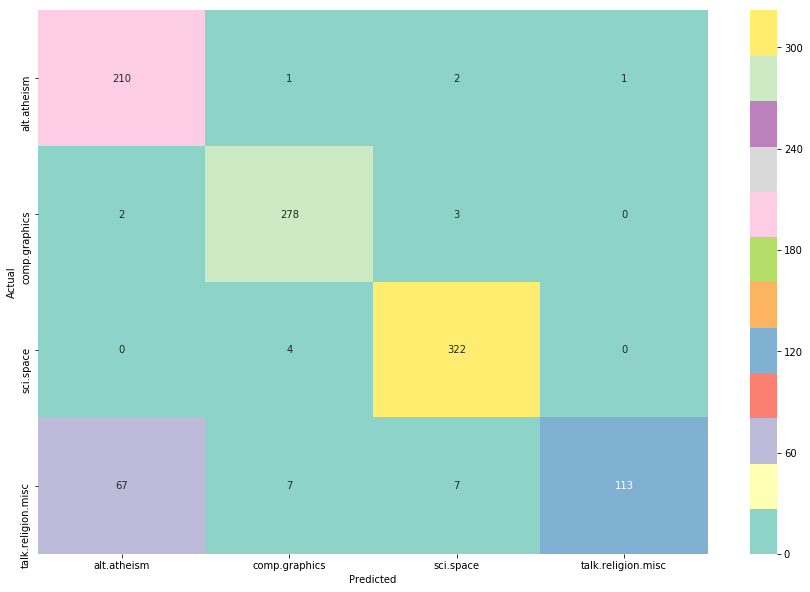

In [58]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


conf_mat = confusion_matrix(y_test, y_pred)
labels=newsgroups_record.target_names
# Plot confusion_matrix
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(conf_mat, annot=True, cmap = "Set3", fmt ="d",
xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Classifier - On unprocessed data
___

Case 2: Testing the accuracy of MultinominalNB on un- processed data 

>Accuracy = 30% apprrox.
___



In [33]:
# Performing vectorisation on uncleaned data to convert the data from text format to numeric before feeding it to the model

count_vect_uncleaned = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)
X_train_counts_uncleaned = count_vect.fit_transform(clean_newsgroup_data)
X_train_counts_uncleaned.shape

(3387, 75)

In [34]:
# Transforming the data as per tf-idf

tfidf_transformer = TfidfTransformer()
X_train_tfidf_uncleaned = tfidf_transformer.fit_transform(X_train_counts_uncleaned)
X_train_tfidf_uncleaned.shape

(3387, 75)

In [35]:
from sklearn.metrics import accuracy_score
X = X_train_tfidf_uncleaned
y = newsgroups_record.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

In [36]:
# Calling the function to train the model. Passing Training data and test data as arguments. 

classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy score : " + str(accuracy_score(y_test,y_pred)))

print("Accuracy: " + str(classifier.score(X_test, y_test)))



Accuracy score : 0.2999016715830875
Accuracy: 0.2999016715830875


Classifer - SVM - SVC
___
Case 1: Testing the accuracy of SVM Classifier on processed data.


Consideration - gamma as scale, Accuracy =  94%approx.
___

In [37]:
from sklearn.metrics import accuracy_score

X = X_train_tfidf
y = newsgroups_record.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

In [38]:
from sklearn import svm


classifier = svm.SVC(gamma='scale')

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy score : " + str(accuracy_score(y_test,y_pred)))

print("Accuracy: " + str(classifier.score(X_test, y_test)))



Accuracy score : 0.9478859390363815
Accuracy: 0.9478859390363815


CONFUSION MATRIX FOR SVC

---

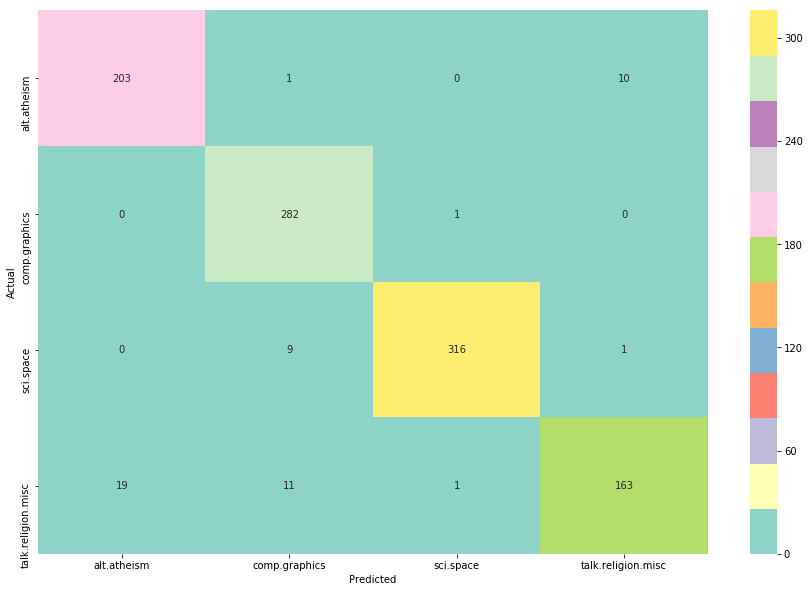

In [39]:
# Confusion matrix for SVC on processed data.


conf_mat = confusion_matrix(y_test, y_pred)
labels=newsgroups_record.target_names
# Plot confusion_matrix
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(conf_mat, annot=True, cmap = "Set3", fmt ="d",
xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

On comparing both Mulinomial NB and SVC, without using and parameter like alpha, Mulinomial NB is yielding around 89% of accuracy whereas SVM yields only approx. 94.7% of accuracy. But when we used parameter alpha=0000.5 in Mulinomial NB, its efficiency increases to 94.6%. Along with this, after changing the kernel paramater SVM's performance is getting more better.

So in general case, SVM seems to perform better in comparision to MultinomialNB.However, if LinearSVC is used, it is yielding accuracy of 95.3% which is highest among all.
Since we have alot of overlapping in the data as seen in the previous section, SVM tends to perform better. And along with that, we have enough data to train the SVM classsifier at best and hence its yielding better performance than Mulinomial NB.

Classifer - SVM - LinearSVC
___
Case 2: Testing the accuracy of SVM Classifier on processed data 

Using Linear SVC , Accuracy =  95%apprrox.
___

In [40]:
classifier = svm.LinearSVC()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy score : " + str(accuracy_score(y_test,y_pred)))
print("Accuracy: " + str(classifier.score(X_test, y_test)))

Accuracy score : 0.9537856440511308
Accuracy: 0.9537856440511308


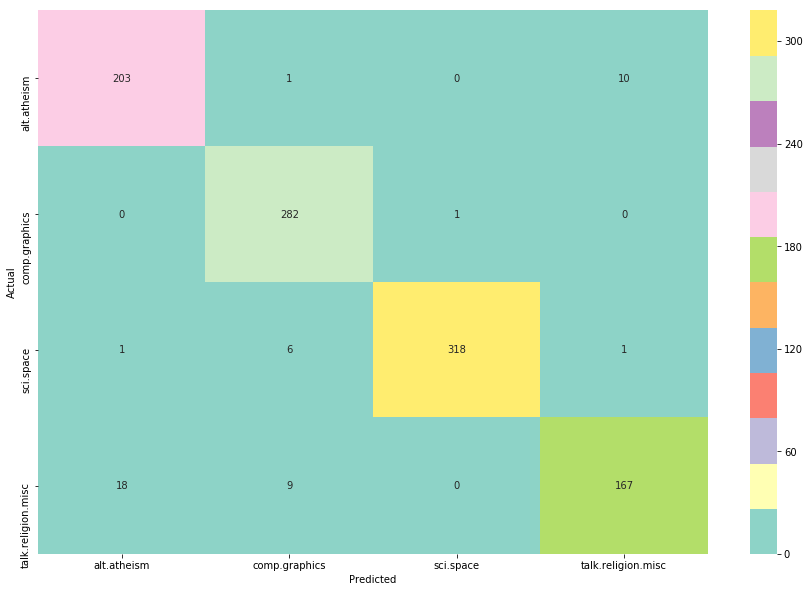

In [41]:
# Confusion matrix for SVC on processed data.


conf_mat = confusion_matrix(y_test, y_pred)
labels=newsgroups_record.target_names
# Plot confusion_matrix
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(conf_mat, annot=True, cmap = "Set3", fmt ="d",
xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Changing the kernel for SVM classifier

___

Case 3: Testing the accuracy of SVM Classifier on processed data 

Yes. changing the kernel is increasing the performance of classifier and it gives best accuracy with linear kernel in coparision to other kernels.
It is notable that, classifier is giving different accuracy based on situation provided.

>Kernel 'Sigmoid' yielding around 27% of accuracy in general but when its gamma parameter is taken into consideration, its performance increases


>Kernel 'rbf' yielding around 27% of accuracy but with parameter its accuracy increases



___


Classifer - SVM - SVC (with linear kernel )
Accuracy =  95.8 %apprrox.

---

In [42]:
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy score : " + str(accuracy_score(y_test,y_pred)))
print("Accuracy: " + str(classifier.score(X_test, y_test)))

Accuracy score : 0.9587020648967551
Accuracy: 0.9587020648967551


Classifer - SVM - SVC (with sigmoid kernel )
___

Case 4: Testing the accuracy of SVM Classifier on processed data.


>Accuracy =  27.8 %approx.,

>Accuracy =  95.1 %approx. with gamma = scale,

>Accuracy =  81 %approx. with gamma = 0.1
___


In [43]:
classifier = svm.SVC(kernel='sigmoid',gamma=0.1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy score : " + str(accuracy_score(y_test,y_pred)))
print("Accuracy: " + str(classifier.score(X_test, y_test)))

Accuracy score : 0.8180924287118977
Accuracy: 0.8180924287118977


Classifer - SVM - SVC (with rbf kernel )
___

Case 5: Testing the accuracy of SVM Classifier on processed data.


>Accuracy =  27.8 %apprrox.,

>Accuracy = 89.1 % approx. with gamma = 0.1,

>Accuracy = 94 % approx. with gamma = 0.5,

>Accuracy = 93.9%approx. with gamma as scale.
___

In [44]:
from sklearn.svm import SVC
classifier = svm.SVC(kernel='rbf',gamma=0.5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy score : " + str(accuracy_score(y_test,y_pred)))
print("Accuracy: " + str(classifier.score(X_test, y_test)))

Accuracy score : 0.9478859390363815
Accuracy: 0.9478859390363815


Answer : 2(d)

---


Perform POS Tagging on Raw Uncleaned data

(stored in variable 'newsgroups_record.data')

---

Taking the uncleaned raw data, tokenization and then tagging is performed.

---

In [45]:
pprint(len(newsgroups_record.data))

3387


In [46]:
# Performing tokenization (store in 'tokenized_text_uncleaned') and tagging on raw data


tokenized_text_uncleaned = []
postag_arr_uncleaned = []

# 'newsgroups_record.data' - Removed the numbers and non-letter character symbols

for i in range(len(newsgroups_record.data)):
    
    tokenized_text_1=word_tokenize(newsgroups_record.data[i])
    tokenized_text_uncleaned.append(tokenized_text_1)
    newsgroup_pos_1 = nltk.pos_tag(tokenized_text_uncleaned[i])
    postag_arr_uncleaned.append(newsgroup_pos_1)
    
pprint(len(tokenized_text_full))
pprint(len(postag_arr))

3387
3387


---

EXTRACTING NOUNS FROM THE CLEAN DATA 
___
 
The clean data obtained after performing 

1.Removed letter and other non-letter characters

2.Removed stop words 

3.Performed stemming

Note :  In Section 1(a), cleaning and stemming was done and it was stored in 'stemmed_words' variable. Now here we are extracting only NN words from the dataset.

In [47]:
postag_arr1 = []
for i in range(len(filter_Sent1)):          
    newsgroup_pos1 = nltk.pos_tag(filter_Sent1[i])
    nouns = [word for (word, pos) in newsgroup_pos1 if pos in ['NN']]
    postag_arr1.append(nouns)
pprint(len(postag_arr1))
   

3387


Performing Vectorization and tf-idf on new data which only contains NN

---


In [49]:
count_vect = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)
X_train_counts = count_vect.fit_transform(postag_arr1)
X_train_counts.shape

(3387, 19522)

In [50]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(3387, 19522)

In [51]:
from sklearn.metrics import accuracy_score
X = X_train_tfidf
y = newsgroups_record.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

Multinomial NB and its Accuracy with only NN data

---

Naive's bayes was implemented on extracted bag of words which contains 'NN' ( Stored in variable 'postag_arr1'). Here , with 'NN' bag of words there is a slight increase in accuracy from 89.4% to 90.5%. 

In [52]:
# Calling the function to train the model. Passing Training data and test data as arguements. 

classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy score : " + str(accuracy_score(y_test,y_pred)))

print("Accuracy: " + str(classifier.score(X_test, y_test)))


Accuracy score : 0.9075712881022615
Accuracy: 0.9075712881022615


SVC

---

SVC was implemented on extracted bag of words which contains 'NN'.
(Stored in variable 'postag_arr1'). Here , with 'NN' bag of words there is a slight increase in accuracy from 94.7% to 95.1%. 

---

In [53]:
classifier = svm.SVC(gamma='scale')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy score : " + str(accuracy_score(y_test,y_pred)))
print("Accuracy: " + str(classifier.score(X_test, y_test)))

Accuracy score : 0.9301868239921337
Accuracy: 0.9301868239921337


Vocabulary Comparison

---

On comparing vocabulary count after extracting the nouns only, the vocabulary count was less, almost half of what we started with. 
The calculation is shown below.

---



In [54]:
#vocabulary count of cleaned data
count_vocab = []
for i in range(len(stemmed_words)):
    for w in stemmed_words[i]:
        count_vocab.append(w)
pprint(len(count_vocab))     

582540


In [55]:
#vocabulary count of data having only NN 

count_vocab1 = []
for i in range(len(postag_arr1)):
    for w in postag_arr1[i]:
        count_vocab1.append(w)
pprint(len(count_vocab1))     

235273


References

1. “5.6.2. The 20 newsgroups text dataset¶,” scikit. [Online]. Available: https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html. [Accessed: 13-Jul-2019]. 

2. /@nicharuch, “Collocations - identifying phrases that act like single words in Natural Language Processing,” Medium, 20-Mar-2018. [Online]. Available: https://medium.com/@nicharuch/collocations-identifying-phrases-that-act-like-individual-words-in-nlp-f58a93a2f84a. [Accessed: 17-Jul-2019]. 

3. “sklearn.naive_bayes.MultinomialNB¶,” scikit. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html. [Accessed: 17-Jul-2019]. 

4. “sklearn.metrics.confusion_matrix¶,” scikit. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html. [Accessed: 17-Jul-2019]. 

5. Collocations. [Online]. Available: http://www.nltk.org/howto/collocations.html. [Accessed: 15-Jul-2019]. 

